# Patient Survival Prediction

In [1]:
#!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import seaborn as sns

In [3]:
np.random.seed(12345)

## Data Loading

In [4]:
dataset = pd.read_csv('dataset.csv')

## Examining the Data

In [5]:
dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

The data types that are used are either one of these: int64, float64, object. Also, from the "Non-Null Count", it can be seen that there are null values in almost all of the columns.

Now, let us examine the data in two parts: numeric part and non-numeric part.

In [7]:
categorical_dataset = dataset.select_dtypes("object")
numeric_dataset = dataset.select_dtypes(exclude=["object"])

In [8]:
categorical_dataset

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [9]:
numeric_dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,180.3,92,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1,114252,59342,81,77.0,27.420000,0,160.0,90,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
2,119783,50777,118,25.0,31.950000,0,172.7,93,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
3,79267,46918,118,81.0,22.640000,1,165.1,92,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,92056,34377,33,19.0,NaN,0,188.0,91,0.073611,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,177.8,927,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0
91709,66119,13486,121,56.0,47.179671,0,183.0,925,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
91710,8981,58179,195,48.0,27.236914,0,170.2,908,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
91711,33776,120598,66,NaN,23.297481,0,154.9,922,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


All the data are divided correctly since originally 85 columns exist and numeric ones have 78, categorical ones have 7 columns.

### Categoric Data Examination

In [10]:
categorical_dataset.describe()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,91601,91713,91713,90051,90051
unique,6,2,5,3,8,11,10
top,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,54060,86183,50586,29999,38816


From "count" column, we know the columns that contain no null values are "icu_type" and "icu_stay_type". Aside from these, the others contain null values no more than 2000.

From "unique" column, it is understood that there are no one-valued column that can be dropped.

Let us see the most frequent value's percentile for each column.

In [11]:
frequencies = categorical_dataset.describe().loc["freq"] / categorical_dataset.describe().loc["count"]
frequency_categorical = pd.DataFrame(frequencies).transpose().rename(index={0:'freq'})  #so that the indexes can be columns
frequency_categorical

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
freq,0.782613,0.539536,0.590168,0.939703,0.551568,0.333133,0.431045


The percentages of "ethnicity" and "icu_stay_type" show us that these values may not be distributed balanced. So, methods such as bootstrap may work for this case.

In [12]:
frequency_tops = frequency_categorical.append(categorical_dataset.describe().loc["top"])
frequency_tops

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
freq,0.782613,0.539536,0.590168,0.939703,0.551568,0.333133,0.431045
top,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular


Lastly, let us see the unique values of each column.

In [13]:
for column in categorical_dataset:
  print(column , categorical_dataset[column].unique())

ethnicity ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
gender ['M' 'F' nan]
icu_admit_source ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
icu_stay_type ['admit' 'readmit' 'transfer']
icu_type ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
apache_3j_bodysystem ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']
apache_2_bodysystem ['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses']


Let us see the distribution of the categorical data.

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

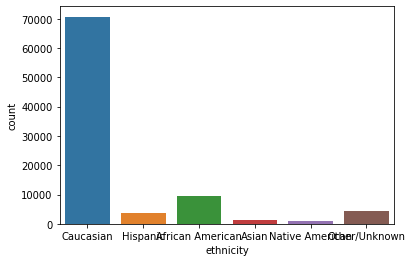

In [14]:
sns.countplot(categorical_dataset[categorical_dataset.columns[0]])

## Numeric Data Examination

In [15]:
numeric_dataset.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Let us find columns that are one-valued if any.

In [16]:
one_valued_cols = []
for col in numeric_dataset:
    if (numeric_dataset.describe()[col]["std"] == 0):
        one_valued_cols.append(col)
one_valued_cols

[]

There is no one-valued column. Then, let us show the standard deviation distribution of these columns in order to see if they need scaling or not:

In [17]:
numeric_std = pd.Series.sort_values(numeric_dataset.describe().loc["std"])
numeric_std

aids                       0.029265
lymphoma                   0.064148
leukemia                   0.083763
gcs_unable_apache          0.097148
hepatic_failure            0.113229
                           ...     
icu_id                   228.989661
apache_3j_diagnosis      463.266985
encounter_id           37795.088538
patient_id             37811.252183
Unnamed: 83                     NaN
Name: std, Length: 78, dtype: float64

Let us drop the column "Unnamed: 83" since it has only NaN values.

In [18]:
dataset.drop(["Unnamed: 83"] , axis=1 , inplace=True)
numeric_dataset.drop(["Unnamed: 83"] , axis=1 , inplace=True)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Updating the std values accordingly (without the dropped column)

In [19]:
numeric_std = pd.Series.sort_values(numeric_dataset.describe().loc["std"])
numeric_std

aids                       0.029265
lymphoma                   0.064148
leukemia                   0.083763
gcs_unable_apache          0.097148
hepatic_failure            0.113229
                           ...     
d1_glucose_max            86.687955
icu_id                   228.989661
apache_3j_diagnosis      463.266985
encounter_id           37795.088538
patient_id             37811.252183
Name: std, Length: 77, dtype: float64

The columns "encounter_id" and "patient_id" are distinct values for each patient and it has nothing to do with our prediction. Thus, their standard deviations are really high. Let us drop them.

In [20]:
dataset.drop(["encounter_id" , "patient_id"] , axis=1 , inplace=True)
numeric_dataset.drop(["encounter_id" , "patient_id"] , axis=1 , inplace=True)
numeric_std = pd.Series.sort_values(numeric_dataset.describe().loc["std"])

(array([60., 10.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.92649343e-02, 2.31911509e+01, 4.63530369e+01, 6.95149229e+01,
        9.26768089e+01, 1.15838695e+02, 1.39000581e+02, 1.62162467e+02,
        1.85324353e+02, 2.08486239e+02, 2.31648125e+02, 2.54810011e+02,
        2.77971897e+02, 3.01133783e+02, 3.24295669e+02, 3.47457555e+02,
        3.70619441e+02, 3.93781327e+02, 4.16943213e+02, 4.40105099e+02,
        4.63266985e+02]),
 <BarContainer object of 20 artists>)

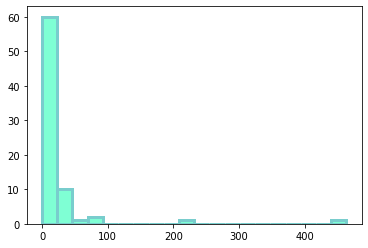

In [21]:
plt.hist(numeric_std , color="#7FFFD4" , ec="#79CDCD" , lw=3 , bins=20)

Most of the columns have standard deviation values that are smaller than 100. However, there are some with over 200 and even 400.

Let us compare the standard deviations of the columns that have the highest and the lowest standard deviation values.

In [22]:
pd.Series.sort_values(numeric_std , ascending=False)

apache_3j_diagnosis    463.266985
icu_id                 228.989661
d1_glucose_max          86.687955
apache_2_diagnosis      86.050882
hospital_id             62.854406
                          ...    
hepatic_failure          0.113229
gcs_unable_apache        0.097148
leukemia                 0.083763
lymphoma                 0.064148
aids                     0.029265
Name: std, Length: 75, dtype: float64

(array([9.092e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.800e+01]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

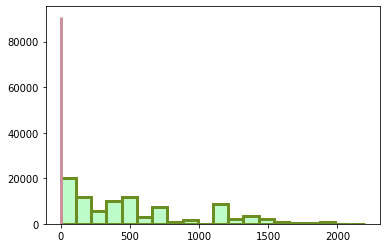

In [23]:
plt.hist(numeric_dataset["apache_3j_diagnosis"] , color="#BDFCC9" , ec="#6B8E23" , lw=3 , bins=20)
plt.hist(numeric_dataset["aids"] , color="#FFC0CB" , ec="#CD919E" , lw=3 , bins=20)

In order to balance this data, methods such as bootstrap is likely to be required.

Also, let us see the distribution of numeric data on histograms.

C:\Users\Asus\AppData\Local\Temp\ipykernel_24340\570009173.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


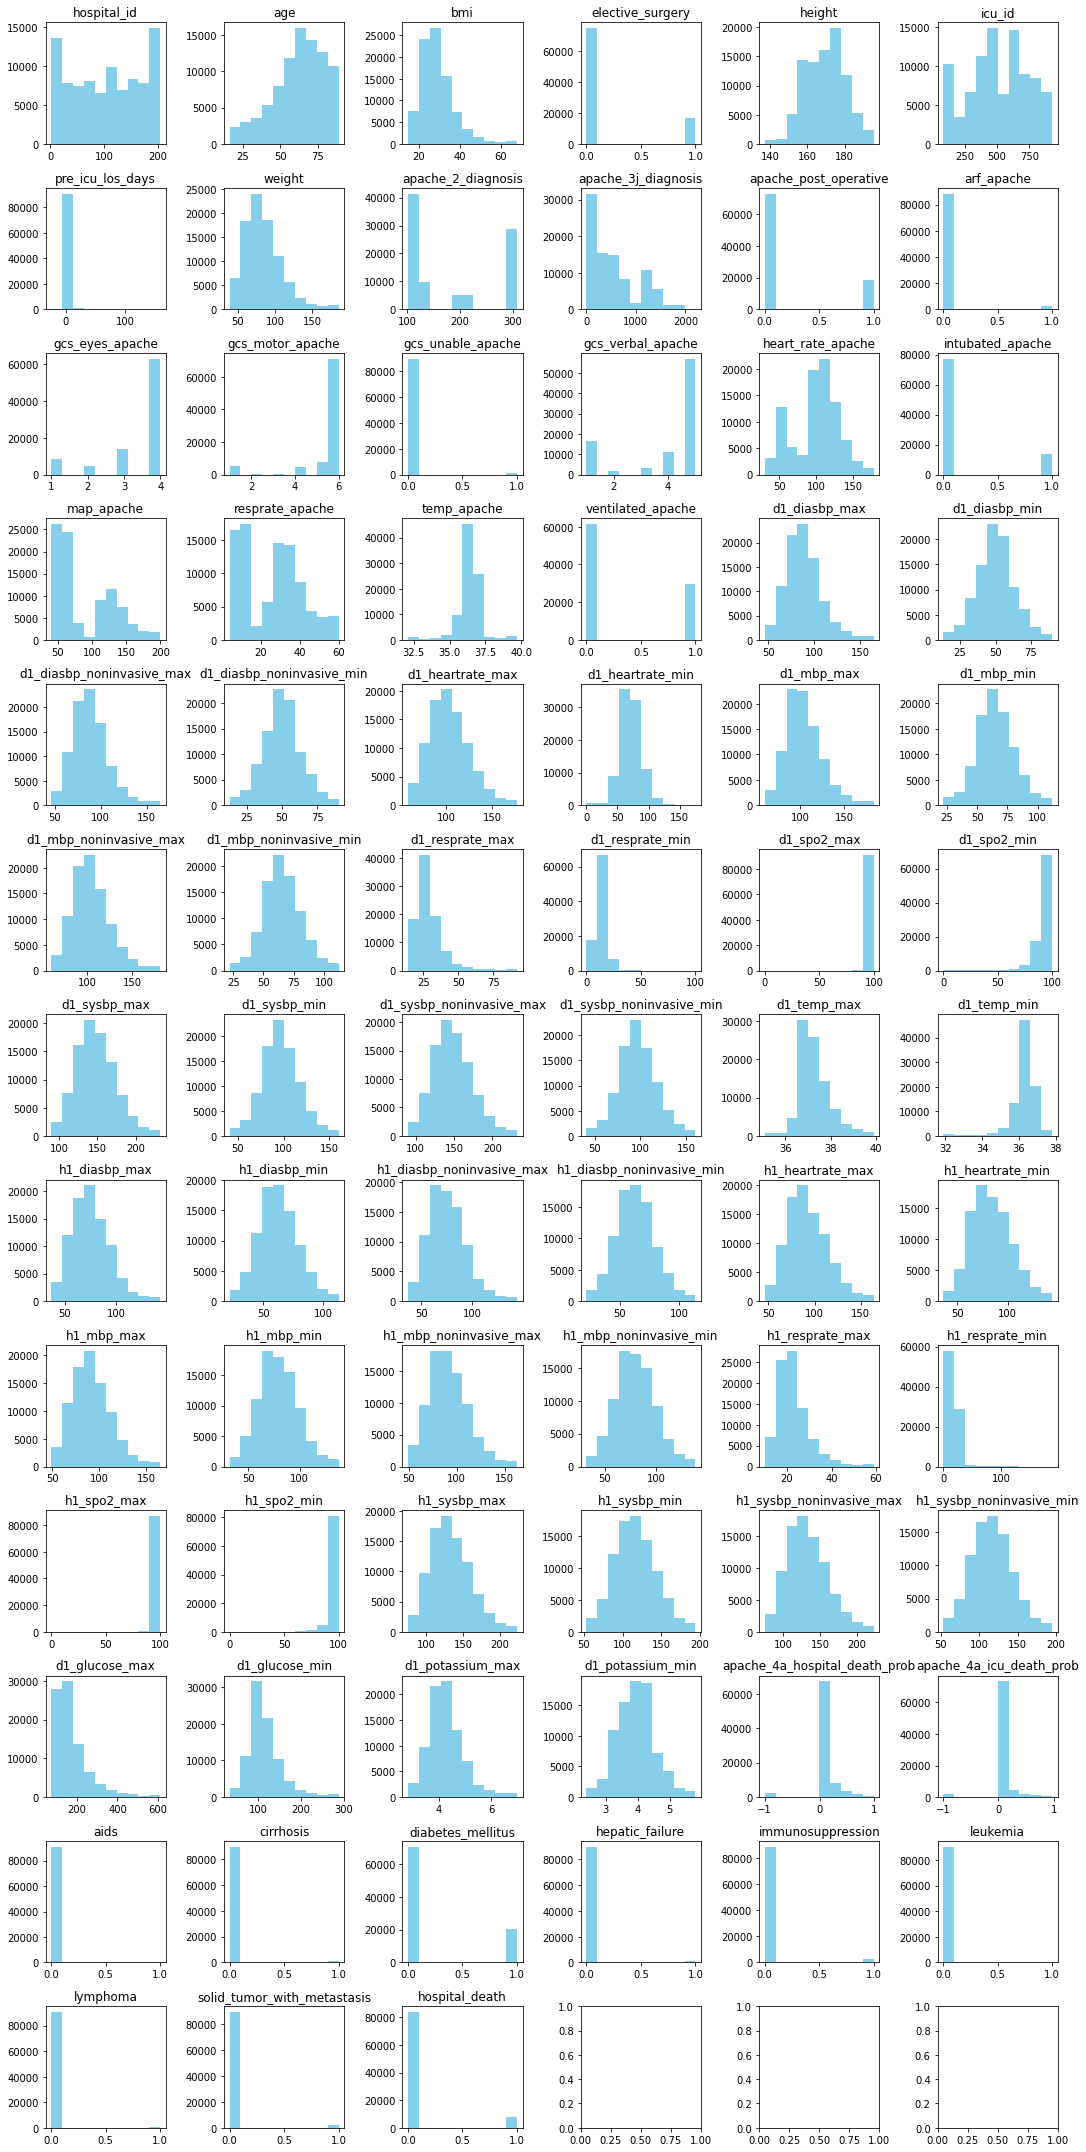

In [24]:
figure, axis = plt.subplots(13,6)
figure.set_figheight(30)
figure.set_figwidth(15)
for n in range(len(numeric_dataset.columns)):
    col = n % 6
    row = n // 6
    axis[row,col].hist(dataset[numeric_dataset.columns[n]], color = "skyblue", lw=0)
    axis[row,col].title.set_text(numeric_dataset.columns[n])
    figure.tight_layout()
figure.show()

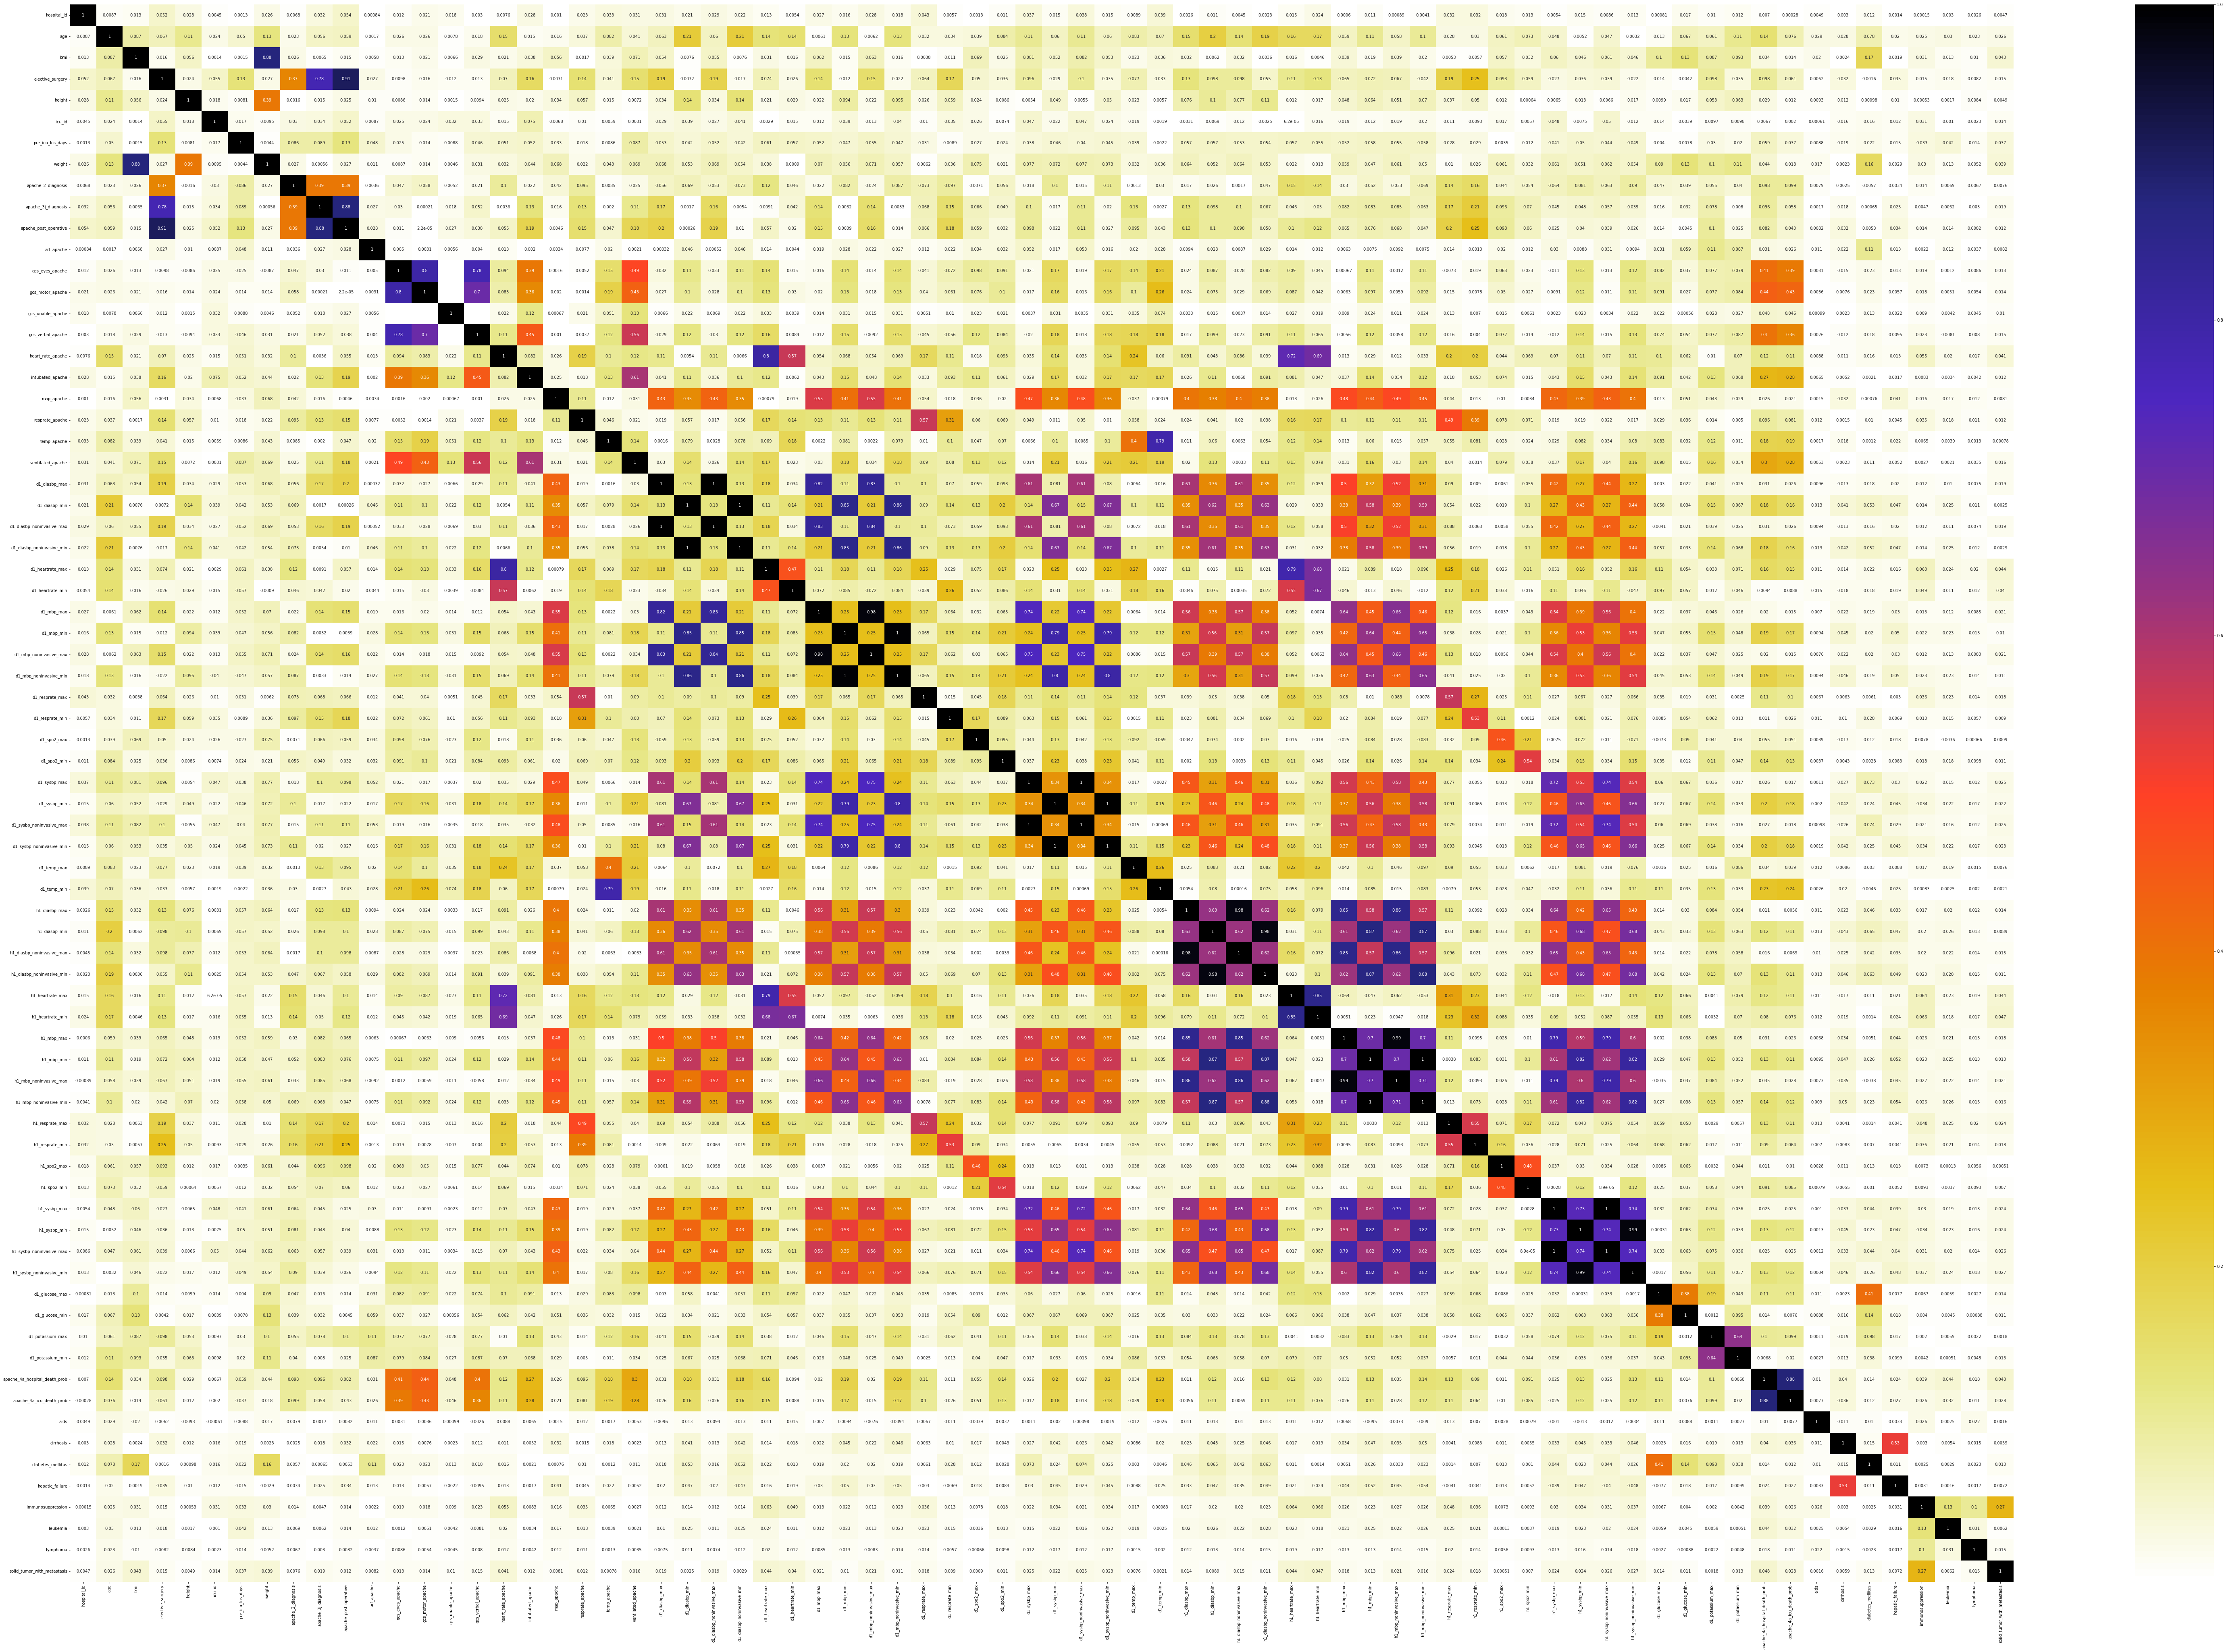

In [25]:
y = dataset["hospital_death"]
x = dataset.drop(['hospital_death'] , axis=1)
pearson_corr = x.corr().abs()
plt.figure(figsize=(108,72))
sns.heatmap(pearson_corr , cmap=plt.cm.CMRmap_r , annot=True)
plt.show()

As it is shown in the correlation table, there are many highly correlated columns that should be eliminated to one since they mean the same thing for the test and training results.

In [26]:
upper = pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.65) and any(upper[column] < 1)]
dataset.drop(to_drop, axis=1, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_24340\2198887873.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1).astype(np.bool))


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    91713 non-null  int64  
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      90318 non-null  object 
 5   gender                         91688 non-null  object 
 6   height                         90379 non-null  float64
 7   icu_admit_source               91601 non-null  object 
 8   icu_id                         91713 non-null  int64  
 9   icu_stay_type                  91713 non-null  object 
 10  icu_type                       91713 non-null  object 
 11  pre_icu_los_days               91713 non-null  float64
 12  apache_2_diagnosis             90051 non-null 

Let's convert categorical data into numerical before moving to clearing the null values.

In [28]:
from sklearn import preprocessing

categorical_features = dataset.select_dtypes(include="object").columns
label_encoder = preprocessing.LabelEncoder()
for i in range(len(categorical_features)):
    dataset[categorical_features[i]]= label_encoder.fit_transform(dataset[categorical_features[i]])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    91713 non-null  int64  
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      91713 non-null  int32  
 5   gender                         91713 non-null  int32  
 6   height                         90379 non-null  float64
 7   icu_admit_source               91713 non-null  int32  
 8   icu_id                         91713 non-null  int64  
 9   icu_stay_type                  91713 non-null  int32  
 10  icu_type                       91713 non-null  int32  
 11  pre_icu_los_days               91713 non-null  float64
 12  apache_2_diagnosis             90051 non-null 

In [29]:
dataset.isnull().sum().sort_values(ascending=True) #the columns that contains the most null values can be dropped

hospital_id                         0
apache_3j_bodysystem                0
apache_2_bodysystem                 0
pre_icu_los_days                    0
icu_type                            0
icu_stay_type                       0
icu_id                              0
hospital_death                      0
gender                              0
ethnicity                           0
elective_surgery                    0
icu_admit_source                    0
d1_heartrate_min                  145
d1_diasbp_min                     165
d1_diasbp_max                     165
d1_spo2_min                       333
d1_spo2_max                       333
d1_resprate_max                   385
d1_resprate_min                   385
diabetes_mellitus                 715
hepatic_failure                   715
immunosuppression                 715
leukemia                          715
cirrhosis                         715
intubated_apache                  715
lymphoma                          715
arf_apache  

In [30]:
dataset.shape

(91713, 52)

In [31]:
data_nulldropped = dataset.dropna()
data_nulldropped.shape  ##too much loss but might be useful

(61593, 52)

In [32]:
data_nulldropped.isnull().sum()

hospital_id                      0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
icu_admit_source                 0
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
apache_2_diagnosis               0
arf_apache                       0
gcs_eyes_apache                  0
gcs_unable_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_heartrate_min                 0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max                      0
d1_spo2_min         

After the correlated columns are dropped, the null values are checked. As there are approximately 92000 patients data in the dataset; instead of columns, the rows which contain null values are dropped to clear the data which caused the patient number to reduce to closely 61000. It is not clear now if this operation is useful so filling the data may be considered as well if the tests do not perform well.

## Splitting Data into Train and Test Sets

In [33]:
data_nulldropped

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,118,68.0,22.730000,0,2,1,180.3,1,92,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,81,77.0,27.420000,0,2,0,160.0,1,90,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
3,118,81.0,22.640000,1,2,0,165.1,2,92,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
5,83,67.0,27.560000,0,2,1,190.5,0,95,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0
6,83,59.0,57.450000,0,2,0,165.1,0,95,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,195,47.0,51.439842,1,2,1,195.0,2,908,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
91706,121,54.0,19.770448,0,4,1,177.8,0,925,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
91708,30,75.0,23.060250,0,2,1,177.8,1,927,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0,0
91709,121,56.0,47.179671,0,2,0,183.0,1,925,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def get_train_test():
    df_copy = data_nulldropped
    scale = StandardScaler()
    scaled = scale.fit(df_copy)
    transformed_model = scaled.transform(df_copy)
    df_copy = pd.DataFrame(transformed_model, index=df_copy.index, columns=df_copy.columns)
    x = df_copy.drop(["hospital_death"] , axis=1)
    y = data_nulldropped["hospital_death"]#df_copy["hospital_death"]
    x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8)
    return x_train , x_test , y_train , y_test

"""def get_train_test():
    df_copy = data_nulldropped
    scale = StandardScaler()
    scaled = scale.fit(df_copy)
    transformed_model = scaled.transform(df_copy)
    df_copy = pd.DataFrame(transformed_model, index=df_copy.index, columns=df_copy.columns)
    x = df_copy.drop(["hospital_death"] , axis=1)
    y = df_copy["hospital_death"]
    x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8)
    return x_train , x_test , y_train , y_test"""

'def get_train_test():\n    df_copy = data_nulldropped\n    scale = StandardScaler()\n    scaled = scale.fit(df_copy)\n    transformed_model = scaled.transform(df_copy)\n    df_copy = pd.DataFrame(transformed_model, index=df_copy.index, columns=df_copy.columns)\n    x = df_copy.drop(["hospital_death"] , axis=1)\n    y = df_copy["hospital_death"]\n    x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8)\n    return x_train , x_test , y_train , y_test'

In [35]:
x_train , x_test , y_train , y_test = get_train_test()

In [36]:
x_train

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
57081,1.081008,-0.528536,0.240791,2.027672,-0.022395,-1.102206,0.030220,1.346365,0.412179,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-0.857540,-0.542637
10221,0.472042,-0.225581,-1.521479,-0.493176,-0.022395,-1.102206,-0.676217,-0.754799,-1.678350,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,5.852900,-0.087312,-0.064477,6.687754,1.241919,-0.899088
79972,1.393298,-1.255627,0.602021,-0.493176,-1.914560,-1.102206,-0.676217,-0.754799,1.296634,3.903296,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,1.241919,-0.899088
20857,-0.433599,-0.164990,-0.193689,2.027672,2.815852,-1.102206,-1.391948,1.346365,-0.521412,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,6.687754,-0.857540,-0.542637
65715,-1.042565,-2.164490,1.337186,-0.493176,-1.914560,-1.102206,-1.475605,-0.754799,0.523853,-0.261009,...,-0.031226,-0.130989,1.799891,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,0.454622,1.952520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67193,-1.370469,0.986237,-0.074346,-0.493176,-0.022395,0.907033,0.941151,2.396947,0.568522,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,0.717054,0.526716
32141,1.518214,0.501510,2.269814,-0.493176,-0.022395,-1.102206,-0.207738,-0.754799,-0.414205,-0.261009,...,-0.031226,-0.130989,1.799891,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-1.119972,-0.899088
3601,0.175367,1.107419,1.232814,-0.493176,-0.022395,0.907033,0.262600,-0.754799,-1.883829,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,1.241919,-0.899088
19418,-0.808347,-0.952672,-0.528050,-0.493176,-0.022395,0.907033,0.197534,-0.754799,-0.570548,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-1.119972,-0.899088


In [37]:
x_test

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
72468,0.924863,0.319737,-0.363977,-0.493176,2.815852,0.907033,0.030220,-0.754799,0.809737,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,1.241919,-0.899088
46474,-1.339240,-1.497990,1.048776,-0.493176,-0.022395,0.907033,1.201417,0.295783,-0.030048,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-1.119972,-0.899088
7013,0.175367,1.228601,-0.684555,2.027672,-0.022395,-1.102206,-2.451602,1.346365,-1.937433,-0.261009,...,-0.031226,-0.130989,1.799891,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-1.119972,-0.899088
7772,0.175367,-0.164990,0.329311,-0.493176,-0.022395,0.907033,0.662294,-0.754799,-1.861495,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,0.717054,0.526716
29774,-1.167481,0.137964,-0.657780,-0.493176,-1.914560,0.907033,1.405911,0.295783,-0.668821,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-0.857540,-0.542637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91679,-1.198710,0.380328,-0.259190,-0.493176,-1.914560,0.907033,1.201417,-0.754799,1.729927,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,1.241919,-0.899088
26784,0.846791,-0.407354,0.221714,-0.493176,-0.022395,0.907033,1.675473,-0.754799,-0.472275,-0.261009,...,-0.031226,7.634202,-0.555589,8.325361,-0.170855,-0.087312,-0.064477,-0.149527,1.241919,-0.899088
35520,-0.574130,-0.770899,-1.291957,-0.493176,-0.022395,-1.102206,-0.211456,0.295783,-0.329333,-0.261009,...,-0.031226,-0.130989,-0.555589,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,0.192190,0.170265
64448,0.596959,0.865055,-0.084503,-0.493176,-0.022395,0.907033,0.848198,2.396947,0.505985,-0.261009,...,-0.031226,-0.130989,1.799891,-0.120115,-0.170855,-0.087312,-0.064477,-0.149527,-1.119972,-0.899088


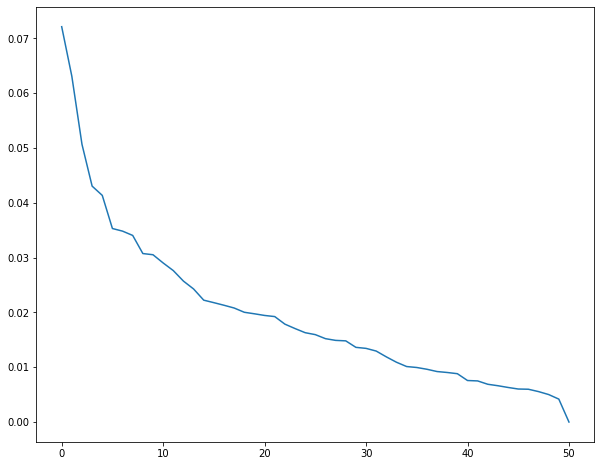

In [38]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_train)
explained_variance_s=pca.explained_variance_ratio_
plt.figure(figsize=(10,8))
_=plt.plot(explained_variance_s)

In [39]:
num_components = [2,3,4,5,6,10,20,30,40,50]
for comp in num_components:
    pca = PCA(n_components=comp)
    X_train_pca = pca.fit_transform(x_train)
    print('Total Explained Variance Ratio using {} components = {}%'.format(comp,round(np.sum(pca.explained_variance_ratio_)*100,2)))

Total Explained Variance Ratio using 2 components = 13.52%
Total Explained Variance Ratio using 3 components = 18.58%
Total Explained Variance Ratio using 4 components = 22.89%
Total Explained Variance Ratio using 5 components = 27.02%
Total Explained Variance Ratio using 6 components = 30.53%
Total Explained Variance Ratio using 10 components = 43.5%
Total Explained Variance Ratio using 20 components = 66.74%
Total Explained Variance Ratio using 30 components = 83.23%
Total Explained Variance Ratio using 40 components = 93.84%
Total Explained Variance Ratio using 50 components = 100.0%


In [40]:
from sklearn.model_selection import KFold, cross_val_score

cross_validation = KFold(n_splits=5 , shuffle=True , random_state=12345)

## Models

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

import time

### Logistic Regression

In [42]:
logistic_regression = LogisticRegression(dual=False , random_state = 12345, max_iter=1000)

start_time_lr_train = time.time()
logistic_regression.fit(x_train , y_train)
time_lr_train = time.time() - start_time_lr_train

start_time_lr_test = time.time()
accuracy_lr = cross_val_score(logistic_regression , x_train , y_train , cv=cross_validation , scoring="accuracy" , n_jobs=-1)
recall_lr = cross_val_score(logistic_regression , x_train , y_train , cv=cross_validation , scoring="recall" , n_jobs=-1)
f1_lr = cross_val_score(logistic_regression , x_train , y_train , cv=cross_validation , scoring="f1" , n_jobs=-1)
roc_auc_lr = cross_val_score(logistic_regression , x_train , y_train , cv=cross_validation , scoring="roc_auc" , n_jobs=-1)
time_lr_test = time.time() - start_time_lr_test

result_logistic_reg = pd.DataFrame({
    "Accuracy" : accuracy_lr, 
    "Recall" : recall_lr, 
    "f1Score" : f1_lr,
    "ROCAUC" : roc_auc_lr
})

result_logistic_reg

,Accuracy,Recall,f1Score,ROCAUC
0,0.923592,0.225845,0.331854,0.861576
1,0.927651,0.231959,0.335508,0.860565
2,0.925926,0.255215,0.363002,0.848304
3,0.920446,0.237500,0.347754,0.865475
4,0.927542,0.251534,0.364769,0.857796


In [43]:
train_score_lr = logistic_regression.score(x_train , y_train)
test_score_lr = logistic_regression.score(x_test , y_test)

print("Train score for logistic regression:", train_score_lr)
print("Test score for logistic regression:", test_score_lr)

Train score for logistic regression: 0.9253764662905386
Test score for logistic regression: 0.924912736423411


overfit???????

### SVM

In [ ]:
support_vector_machine = svm.SVC()    ####do not run

start_time_svm_train = time.time()
support_vector_machine.fit(x_train , y_train)
time_svm_train = time.time() - start_time_svm_train

start_time_svm_test = time.time()
accuracy_svm = cross_val_score(support_vector_machine , x_train , y_train , cv=cross_validation , scoring="accuracy" , n_jobs=-1)
recall_svm = cross_val_score(support_vector_machine , x_train , y_train , cv=cross_validation , scoring="recall" , n_jobs=-1)
f1_svm = cross_val_score(support_vector_machine , x_train , y_train , cv=cross_validation , scoring="f1" , n_jobs=-1)
roc_auc_svm = cross_val_score(support_vector_machine , x_train , y_train , cv=cross_validation , scoring="roc_auc" , n_jobs=-1)
time_svm_test = time.time() - start_time_svm_test

result_svm = pd.DataFrame({
    "Accuracy" : accuracy_svm, 
    "Recall" : recall_svm, 
    "f1Score" : f1_svm,
    "ROCAUC" : roc_auc_svm
})

result_svm

In [ ]:
train_score_svm = support_vector_machine.score(x_train , y_train)
test_score_svm = support_vector_machine.score(x_test , y_test)

print("Train score for SVM:", train_score_svm)
print("Test score for SVM:", test_score_svm)

overfit???????

### Random Forest

In [ ]:
random_forest = RandomForestClassifier()
      ####do not run
start_time_rf_train = time.time()
random_forest.fit(x_train , y_train)
time_rf_train = time.time() - start_time_rf_train

start_time_rf_test = time.time()
accuracy_rf = cross_val_score(random_forest , x_train , y_train , cv=cross_validation , scoring="accuracy" , n_jobs=-1)
recall_rf = cross_val_score(random_forest , x_train , y_train , cv=cross_validation , scoring="recall" , n_jobs=-1)
f1_rf = cross_val_score(random_forest , x_train , y_train , cv=cross_validation , scoring="f1" , n_jobs=-1)
roc_auc_rf = cross_val_score(random_forest , x_train , y_train , cv=cross_validation , scoring="roc_auc" , n_jobs=-1)
time_rf_test = time.time() - start_time_rf_test

result_random_forest = pd.DataFrame({
    "Accuracy" : accuracy_rf, 
    "Recall" : recall_rf, 
    "f1Score" : f1_rf,
    "ROCAUC" : roc_auc_rf
})

result_random_forest

In [ ]:
train_score_rf = random_forest.score(x_train , y_train)
test_score_rf = random_forest.score(x_test , y_test)

print("Train score for random forest:", train_score_rf)
print("Test score for random forest:", test_score_rf)

overfit???????

### XGBoost

In [44]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

start_time_xgb_train = time.time()
xgboost.fit(x_train , y_train)
time_xgb_train = time.time() - start_time_xgb_train

start_time_xgb_test = time.time()
accuracy_xgb = cross_val_score(xgboost , x_train , y_train , cv=cross_validation , scoring="accuracy" , n_jobs=-1)
recall_xgb = cross_val_score(xgboost , x_train , y_train , cv=cross_validation , scoring="recall" , n_jobs=-1)
f1_xgb = cross_val_score(xgboost , x_train , y_train , cv=cross_validation , scoring="f1" , n_jobs=-1)
roc_auc_xgb = cross_val_score(xgboost , x_train , y_train , cv=cross_validation , scoring="roc_auc" , n_jobs=-1)
time_xgb_test = time.time() - start_time_xgb_test

result_xgb = pd.DataFrame({
    "Accuracy" : accuracy_xgb, 
    "Recall" : recall_xgb, 
    "f1Score" : f1_xgb,
    "ROCAUC" : roc_auc_xgb
})

result_xgb

,Accuracy,Recall,f1Score,ROCAUC
0,0.927245,0.306763,0.414694,0.880600
1,0.930086,0.295103,0.399303,0.876043
2,0.925419,0.293252,0.394064,0.856650
3,0.921664,0.289773,0.397816,0.873316
4,0.927644,0.312883,0.417007,0.869701


In [45]:
train_score_xgb = xgboost.score(x_train , y_train)
test_score_xgb = xgboost.score(x_test , y_test)

print("Train score for xgboost:", train_score_xgb)
print("Test score for xgboost:", test_score_xgb)

Train score for xgboost: 0.9716686284856111
Test score for xgboost: 0.9259680168844874
